# InceptionV3 on Cifar10 dataset

#### Importing the necessary Libraries

In [0]:
import cv2
import numpy as np
from sklearn.metrics import precision_score,recall_score,log_loss
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten, GlobalAveragePooling2D
from keras import models,losses,optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import InceptionV3,VGG16,resnet50
from keras.applications.inception_v3 import preprocess_input
from keras.models import Model
from keras.layers import Dense, Dropout, Conv2D, GlobalAveragePooling2D

#### Loading the data and performing inbuilt pre-processing

In [2]:
from tensorflow.keras.datasets import cifar10
(X_train,y_train),(X_test,y_test) = cifar10.load_data()
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train = ohe.fit_transform(y_train).toarray().astype(int)
y_test = ohe.transform(y_test).toarray().astype(int)
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
n_train = X_train.shape[0]
n_test = X_test.shape[0]

In [4]:
print( X_train.shape, y_train.shape,  X_test.shape, y_test.shape )

(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


#### Function to resize the input image
    - Intitial size : (32x32)
    - Final size : (100x100)

In [0]:
def resize_data(data):
  data_upscaled = []
  for i, img in enumerate(data):
    large_img = cv2.resize(img, dsize=(139, 139))
    data_upscaled.append(large_img)
  return data_upscaled

In [0]:
X_train_new = np.array(resize_data(X_train))
X_test_new = np.array(resize_data(X_test)) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


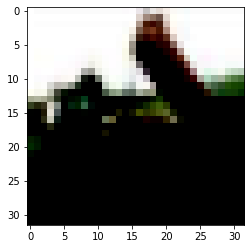

In [8]:
import matplotlib.pyplot as plt
#print(X_train[0])
plt.imshow(X_train[2])

#### Model Building

In [9]:
base = InceptionV3(include_top = False,weights='imagenet',input_shape = (139,139,3))
model = models.Sequential()
model.add(base)
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, activation='relu', name='Dense_Intermediate'))
model.add(Dropout(0.5, name='Dropout_Regularization'))
model.add(Dense(10, activation='softmax', name='Output'))

87916544/87910968 [==============================] - 1s 0us/step


In [0]:
for cnnlayer in model.layers[0].layers:
    cnnlayer.trainable = False
model.layers[0].trainable = False

In [0]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [0]:
model.summary()

In [14]:
model.fit(X_train_new,y_train,epochs=10,batch_size=500,validation_data=(X_test_new,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 151s 3ms/step - loss: 2.4298 - accuracy: 0.4902 - val_loss: 1.5075 - val_accuracy: 0.6596
Epoch 2/10
50000/50000 [==============================] - 142s 3ms/step - loss: 1.0866 - accuracy: 0.6371 - val_loss: 2.4264 - val_accuracy: 0.5850
Epoch 3/10
50000/50000 [==============================] - 142s 3ms/step - loss: 0.9453 - accuracy: 0.6790 - val_loss: 1.7749 - val_accuracy: 0.6710
Epoch 4/10
50000/50000 [==============================] - 142s 3ms/step - loss: 0.8525 - accuracy: 0.7060 - val_loss: 1.3283 - val_accuracy: 0.7258
Epoch 5/10
50000/50000 [==============================] - 142s 3ms/step - loss: 0.7862 - accuracy: 0.7275 - val_loss: 1.5659 - val_accuracy: 0.6920
Epoch 6/10
50000/50000 [==============================] - 142s 3ms/step - loss: 0.7226 - accuracy: 0.7492 - val_loss: 1.3317 - val_accuracy: 0.7422
Epoch 7/10
50000/50000 [==============================] - 142s

#### Performance Evaluation

In [16]:
y_pred = model.predict(X_test_new)
y_pred = y_pred.round().astype(int)
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [19]:
classwise_precision = precision_score(y_test,y_pred, average=None)
for i in range(len(classwise_precision)):
  print("Precision for class {} = {}".format(i,classwise_precision[i]))
print("Mean Precision = ",classwise_precision.mean())

Precision for class 0 = 0.8491686460807601
Precision for class 1 = 0.7165532879818595
Precision for class 2 = 0.9300476947535771
Precision for class 3 = 0.7901701323251418
Precision for class 4 = 0.5950653120464441
Precision for class 5 = 0.5360520094562647
Precision for class 6 = 0.9304635761589404
Precision for class 7 = 0.8554070473876063
Precision for class 8 = 0.8426640926640927
Precision for class 9 = 0.8970414201183432
Mean Precision =  0.794263321897303


In [20]:
classwise_recall = recall_score(y_test,y_pred, average=None)
for i in range(len(classwise_recall)):
  print("Recall for class {} = {}".format(i,classwise_recall[i]))
print("Mean Recall = ",classwise_recall.mean())

Recall for class 0 = 0.715
Recall for class 1 = 0.948
Recall for class 2 = 0.585
Recall for class 3 = 0.418
Recall for class 4 = 0.82
Recall for class 5 = 0.907
Recall for class 6 = 0.562
Recall for class 7 = 0.704
Recall for class 8 = 0.873
Recall for class 9 = 0.758
Mean Recall =  0.7289999999999999


In [21]:
print("Log Loss = ",log_loss(y_test,y_pred))

Log Loss =  8.396146283093497
